<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXERCISE_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: EXERCISE 2.1

Name: Juan Manuel G.G

Date: february 2021

### 1. Process description 

A perfectly stirred, constant-volume tank has two input streams, both consisting of the same liquid. The temperature and ﬂow rate of each of the streams can vary with time

### 2. Assumptions 

* Constant density 
* Insulated tank 
* Calorific capacity constant 

### 3. Process' scheme 

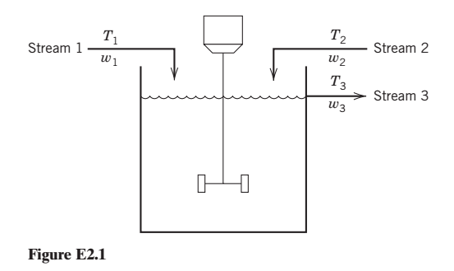

### 4. Analysis

#### Establish the model 

Mas balance 

$$\frac{d(\rho V)}{dt} = w_1 + w_2 - w = 0$$

$$
w_1 + w_2 - w = 0 \tag{1}
$$

Energy balance

$$\frac{dH}{dt} = w_1 \hat{H}_1 + w_2 \hat{H}_2 - w \hat{H}$$


$$\rho \bar{V}c\frac{dT}{dt} = w_1 c T_1 + w_2 c T_2 - w c T$$

$$\rho \bar{V}\frac{dT}{dt} = w_1  T_1 + w_2  T_2 - (w_1 + w_2) T$$

$$
\rho \bar{V}\frac{dT}{dt} = w_1  (T_1 - T) + w_2 ( T_2 - T) \tag{2}
$$

#### Degrees of freedom analysis

state variables: T (1)

equations: 1 DE (1)

degrees of freedom: 1 - 1 = 0

inputs: w1, w2, w3, T1, T2

paramters: $\rho$, c

#### Steady state 

Equating (2) to zero we get 

$$w_1(T_1 - T) + w_2(T2 - T) = 0$$

$$
T = \frac{w_1 T_1 + w_2 T_2}{w_1 + w_2} \tag{3}
$$

In [1]:
import sympy as sp

In [2]:
w1, T1, T, w2, T2 = sp.symbols("w1, T1, T, w2, T2")

In [3]:
eq = sp.Eq(w1*(T1 - T) + w2*(T2 - T), 0)

In [4]:
sp.solve(eq, T)

[(T1*w1 + T2*w2)/(w1 + w2)]

#### Simulation 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [6]:
# establish the model 
def tank(s,time,p,u):

    # state variables
    T = s[0]

    # inputs
    w1 = u[0]
    T1 = u[1]
    w2 = u[2]
    T2 = u[3]

    # parameters
    rho = p[0]
    V = p[1]

    # energy balance 
    dTdt = (1/(rho*V))*(w1*(T1-T) + w2*(T2-T))

    return [dTdt]

In [10]:
# establish paramters
p = [1000, 1] # kg/m3, m3

# establish inputs 
u = [10,220,12,300]

# establish initial conditions 
s = [150]

# set integration time
time = np.linspace(0,500,100)

In [11]:
# solve ODEs
out = odeint(tank,s,time,args=(p,u))

Text(0, 0.5, 'Temperature (K)')

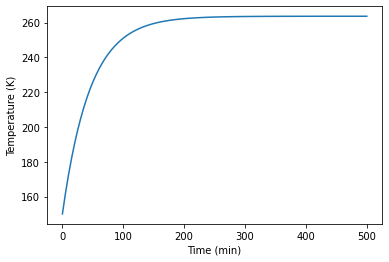

In [13]:
plt.plot(time, out)
plt.xlabel("Time (min)")
plt.ylabel("Temperature (K)")

In [14]:
def steady_state(u):

    # inputs
    w1 = u[0]
    T1 = u[1]
    w2 = u[2]
    T2 = u[3]

    T = (w1*T1 + w2*T2)/(w1+w2)

    return T

In [15]:
steady_state(u)

263.6363636363636